# 1- Análisis de Sentimiento en Twitter


Primero importamos pandas y cargamos el archivo CSV

In [6]:

import pandas as pd
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('twitter_training.csv', sep=',')
data.head()

Saving twitter_training.csv to twitter_training.csv


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


El archivo carece de nombres de columnas, los cuales vamos a crear

In [7]:
data.columns = ['id', 'title', 'rating', 'opinion']
data.head()

,id,title,rating,opinion
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


Se borra la tabla id, la cual no me sirve

In [8]:
mydata = data.drop('id', axis=1)
mydata.head()

,title,rating,opinion
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


Verifico si alguna opinion es nula, la dropeo y confirmo si se hizo bien

In [9]:
nulos_opinion = mydata['opinion'].isnull().sum()
nulos_opinion

686

In [10]:
mydata = mydata.dropna(subset=['opinion'])

In [11]:
nulos_opinion = mydata['opinion'].isnull().sum()
nulos_opinion

0

In [12]:
mydata['opinion']

0        I am coming to the borders and I will kill you...
1        im getting on borderlands and i will kill you ...
2        im coming on borderlands and i will murder you...
3        im getting on borderlands 2 and i will murder ...
4        im getting into borderlands and i can murder y...
                               ...                        
74676    Just realized that the Windows partition of my...
74677    Just realized that my Mac window partition is ...
74678    Just realized the windows partition of my Mac ...
74679    Just realized between the windows partition of...
74680    Just like the windows partition of my Mac is l...
Name: opinion, Length: 73995, dtype: object

Defino una funcion para limpiar el texto, removiendo caracteres especiales y creando una tabla con los datos limpios

In [13]:
import re

def clean(text):

    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

mydata['clean opinion'] = mydata['opinion'].astype(str)
mydata.head()

,title,rating,opinion,clean opinion
0,Borderlands,Positive,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...


Utilizo la biblioteca NLTK para procesar el texto en ingles, guardando cada palabra en su categoria de que tipo de palabra es


In [14]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
import nltk
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

mydata['POS tagged'] = mydata['clean opinion'].apply(token_stop_pos)
mydata.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,title,rating,opinion,clean opinion,POS tagged
0,Borderlands,Positive,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...,"[(coming, v), (borders, n), (kill, v), (,, None)]"
1,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...,"[(im, n), (getting, v), (borderlands, n), (kil..."
2,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,"[(im, n), (coming, v), (borderlands, n), (murd..."
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...,"[(im, n), (getting, v), (borderlands, n), (2, ..."
4,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...,"[(im, n), (getting, v), (borderlands, n), (mur..."


Este codigo define una funcion para lematizar palabras, que se basa en la manera que se expresa. Esta lematizacion hace que las palabras creadas en Pos Tagged se conviertan en su version mas sencilla

In [15]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

mydata['Lemma'] = mydata['POS tagged'].apply(lemmatize)
mydata.head()

,title,rating,opinion,clean opinion,POS tagged,Lemma
0,Borderlands,Positive,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...,"[(coming, v), (borders, n), (kill, v), (,, None)]","come border kill ,"
1,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...,"[(im, n), (getting, v), (borderlands, n), (kil...","im get borderland kill ,"
2,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,"[(im, n), (coming, v), (borderlands, n), (murd...","im come borderland murder ,"
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...,"[(im, n), (getting, v), (borderlands, n), (2, ...","im get borderland 2 murder ,"
4,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...,"[(im, n), (getting, v), (borderlands, n), (mur...","im get borderland murder ,"


Analizamos si existen hashtags relevantes en el texto, que en realidad no hay

In [24]:
def count_hashtags(text):
    # Utilizamos una expresión regular para encontrar los hashtags en el texto
    hashtags = re.findall(r'#\w+', str(text))
    return len(hashtags)

# Aplicar la función count_hashtags a cada fila de la columna 'opinion'
mydata['num_hashtags'] = mydata['opinion'].apply(count_hashtags)

# Mostrar el resultado
print(mydata[['opinion', 'num_hashtags']].head())

                                             opinion  num_hashtags
0  I am coming to the borders and I will kill you...             0
1  im getting on borderlands and i will kill you ...             0
2  im coming on borderlands and i will murder you...             0
3  im getting on borderlands 2 and i will murder ...             0
4  im getting into borderlands and i can murder y...             0


In [17]:
fin_data = pd.DataFrame(mydata[['opinion', 'Lemma']])

Ahora usanto Textblon creamos funiones para subjetividad y polaridad

In [16]:
from textblob import TextBlob

# function to calculate subjectivity
def getSubjectivity(opinion):
    return TextBlob(opinion).sentiment.subjectivity

# function to calculate polarity
def getPolarity(opinion):
    return TextBlob(opinion).sentiment.polarity


In [18]:
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity)
fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity)
fin_data.head()

,opinion,Lemma,Polarity,Subjectivity
0,I am coming to the borders and I will kill you...,"come border kill ,",0.0,0.0
1,im getting on borderlands and i will kill you ...,"im get borderland kill ,",0.0,0.0
2,im coming on borderlands and i will murder you...,"im come borderland murder ,",0.0,0.0
3,im getting on borderlands 2 and i will murder ...,"im get borderland 2 murder ,",0.0,0.0
4,im getting into borderlands and i can murder y...,"im get borderland murder ,",0.0,0.0


In [19]:
tb_counts =  mydata['rating'].value_counts()
tb_counts

rating
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

Ahora hago un grafico en torta

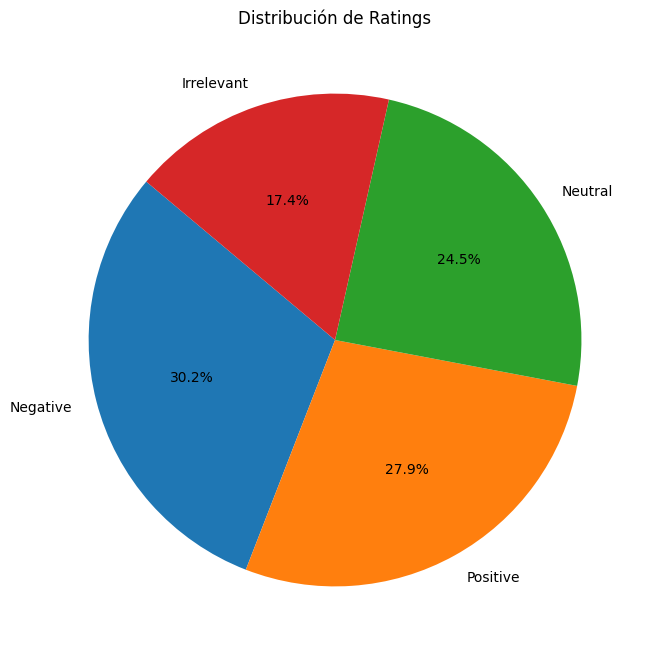

In [20]:
import matplotlib.pyplot as plt
b_counts = mydata['rating'].value_counts()


tb_counts = mydata['rating'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(tb_counts, labels=tb_counts.index, autopct='%1.1f%%', startangle=140)


plt.title('Distribución de Ratings')

plt.show()

Quitare los datos irrelevantes para solamente ver los datos que me sirven

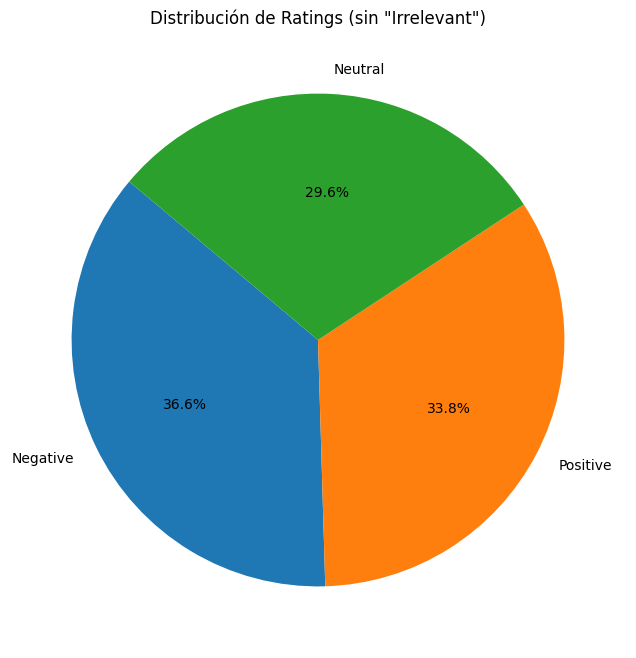

In [21]:
#Quitare los datos irrelevantes para solamente ver los datos que me sirven
import matplotlib.pyplot as plt

# Filtrar los datos para excluir la categoría 'Irrelevant'
filtered_data = mydata[mydata['rating'] != 'Irrelevant']
tb_counts = filtered_data['rating'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(tb_counts, labels=tb_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Ratings (sin "Irrelevant")')
plt.show()


Ahora un grafico de barras de los titulos con mejor rating

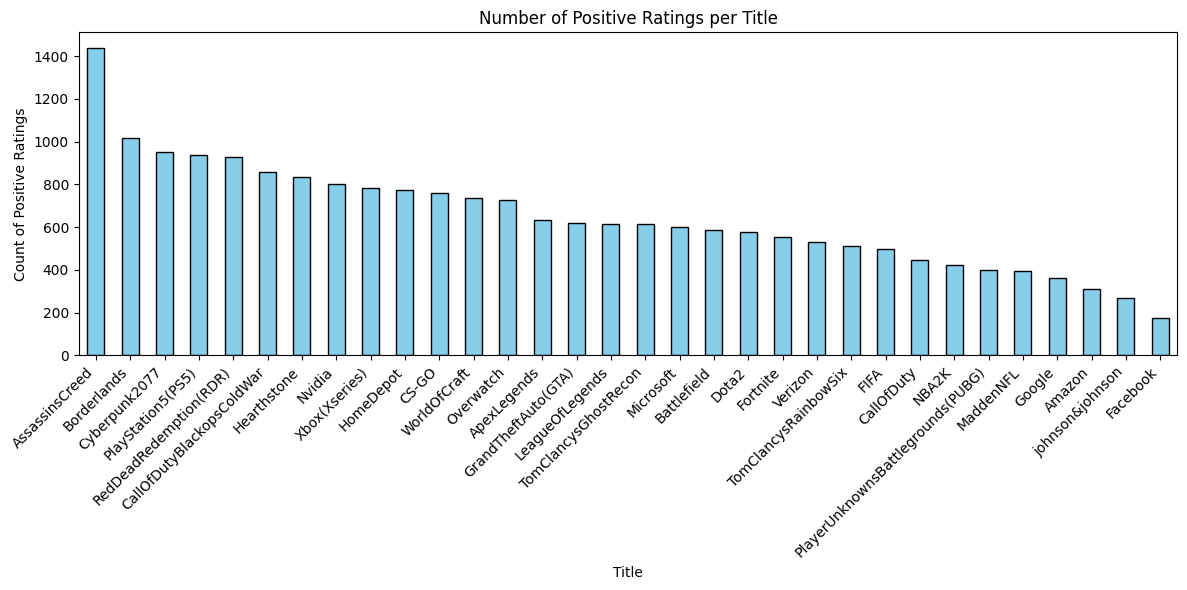

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtra las calificaciones positivas
positive_ratings = mydata[mydata['rating'] == 'Positive']

# Cuenta las calificaciones positivas por juego
positive_counts = positive_ratings['title'].value_counts()

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
positive_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Positive Ratings per Title')
plt.xlabel('Title')
plt.ylabel('Count of Positive Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Entrenamiento de Modelo Naive Bayes y SVM

Este código prepara los datos para el análisis de sentimiento al dividir el conjunto de datos en dos y luego separa estos conjuntos en conjuntos de entrenamiento y prueba. Se usa una prueba del 30 porciento



In [53]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline

X = mydata['opinion']  # Features
y = mydata['rating']    # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Este código crea un pipeline para entrenar un modelo SVM (Support Vector Machine) en el análisis de sentimiento.Incluye la vectorizacion del texto  TF-IDF y y el segundo es la clasificación utilizando SVM con un kernel lineal.
Luego, se entrena el modelo SVM p, se hacen pruebas y se muestran los resultados para ver si son posititvos con respecto a las metricas

In [26]:
# Entrenamiento modelo SVM
svm_pipeline = Pipeline([
    ('VectorizerTF', TfidfVectorizer()),
    ('Clasificacion ', SVC(kernel='linear'))
])

# Entrenamiento
svm_pipeline.fit(X_train, y_train)

# Prediciones
svm_pred = svm_pipeline.predict(X_test)

# Resultados
print("\nSVM:")
print(classification_report(y_test, svm_pred))
print("Accuracy:", accuracy_score(y_test, svm_pred))


SVM:
              precision    recall  f1-score   support

  Irrelevant       0.84      0.76      0.80      3900
    Negative       0.83      0.88      0.85      6709
     Neutral       0.86      0.78      0.82      5418
    Positive       0.79      0.86      0.82      6172

    accuracy                           0.83     22199
   macro avg       0.83      0.82      0.82     22199
weighted avg       0.83      0.83      0.83     22199

Accuracy: 0.8269291409522952


Hacemos lo mismo pero con Naive Bayes

In [29]:

# Creamos un pipeline que vectoriza los textos y luego entrena el modelo Naive Bayes
PipelineNB  = Pipeline([
    ('VectorizerTF', TfidfVectorizer()),
    ('Clasificacion', MultinomialNB())
])

In [32]:
# Entrenamiento
PipelineNB.fit(X_train, y_train)

# Prediciones
NBPredict = PipelineNB.predict(X_test)

# Resultados
print("Naive Bayes:")
print(classification_report(y_test, NBPredict))
print("Accuracy:", accuracy_score(y_test, NBPredict))

Naive Bayes:
              precision    recall  f1-score   support

  Irrelevant       0.96      0.36      0.52      3900
    Negative       0.63      0.90      0.75      6709
     Neutral       0.84      0.60      0.70      5418
    Positive       0.69      0.82      0.75      6172

    accuracy                           0.71     22199
   macro avg       0.78      0.67      0.68     22199
weighted avg       0.76      0.71      0.70     22199

Accuracy: 0.7097166539033289


#Graficos relacionados

In [ ]:
Ahora se hacen graficos para visualizar los datos

<ipython-input-37-27f4ab2597f6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


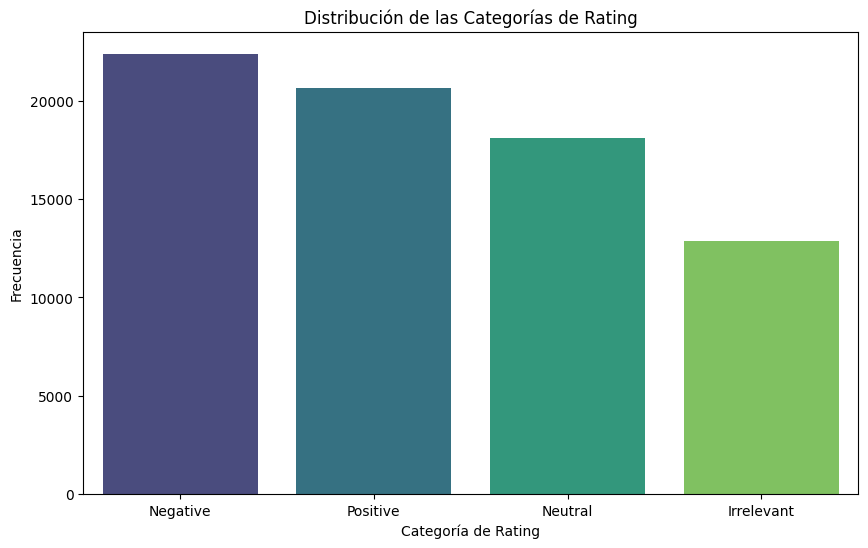

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


rating_counts = mydata['rating'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Distribución de las Categorías de Rating')
plt.xlabel('Categoría de Rating')
plt.ylabel('Frecuencia')
plt.show()

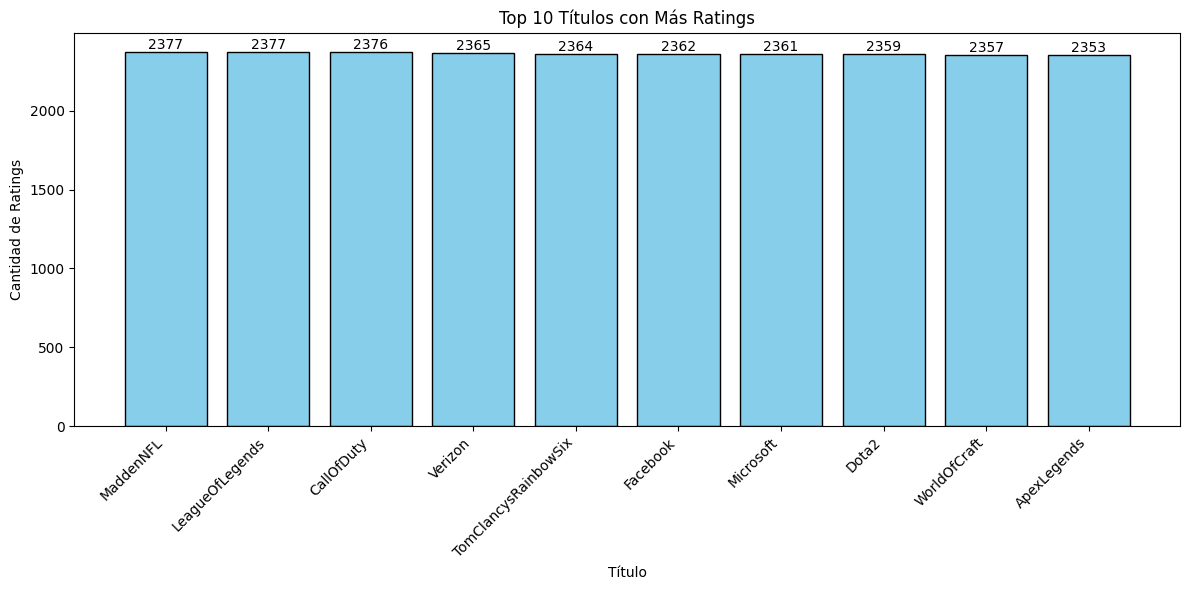

In [49]:

plt.figure(figsize=(12, 6))
bars = plt.bar(top_titles.index, top_titles.values, color='skyblue', edgecolor='black')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, int(yval), ha='center', va='bottom')

plt.title('Top 10 Títulos con Más Ratings')
plt.xlabel('Título')
plt.ylabel('Cantidad de Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

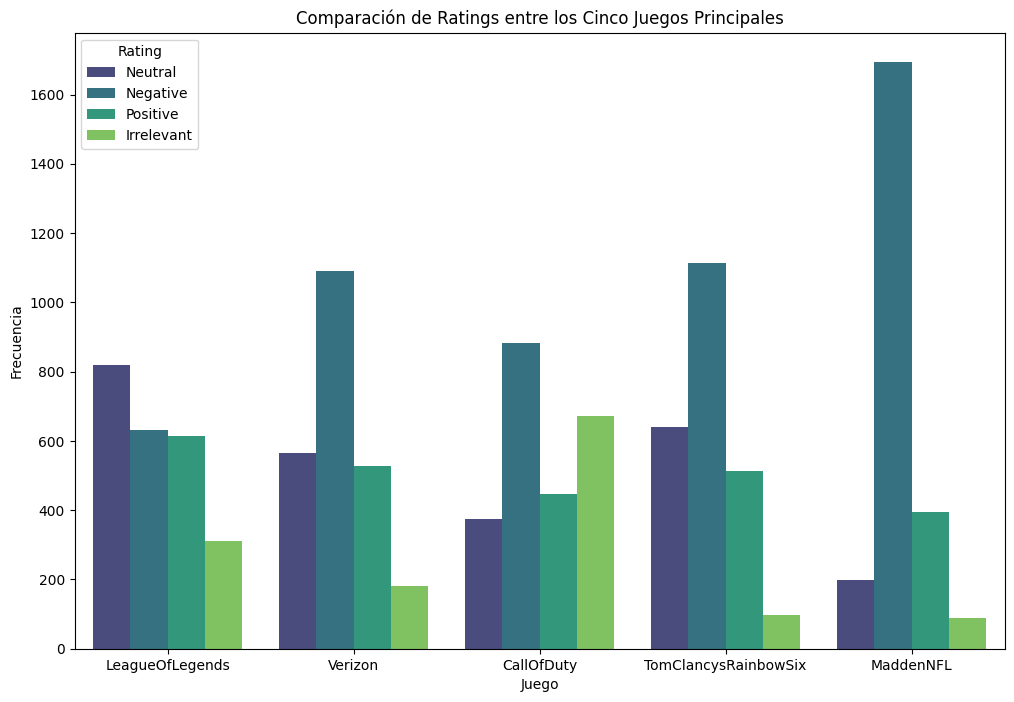

In [38]:

top_games = mydata['title'].value_counts().head(5).index
top_games_data = mydata[mydata['title'].isin(top_games)]


plt.figure(figsize=(12, 8))
sns.countplot(data=top_games_data, x='title', hue='rating', palette='viridis')
plt.title('Comparación de Ratings entre los Cinco Juegos Principales')
plt.xlabel('Juego')
plt.ylabel('Frecuencia')
plt.legend(title='Rating')
plt.show()

<ipython-input-50-ef2d9e130064>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_ratings['comment_length'] = relevant_ratings['opinion'].apply(lambda x: len(str(x).split()))
<ipython-input-50-ef2d9e130064>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_lengths.index, y=average_lengths.values, palette='viridis')


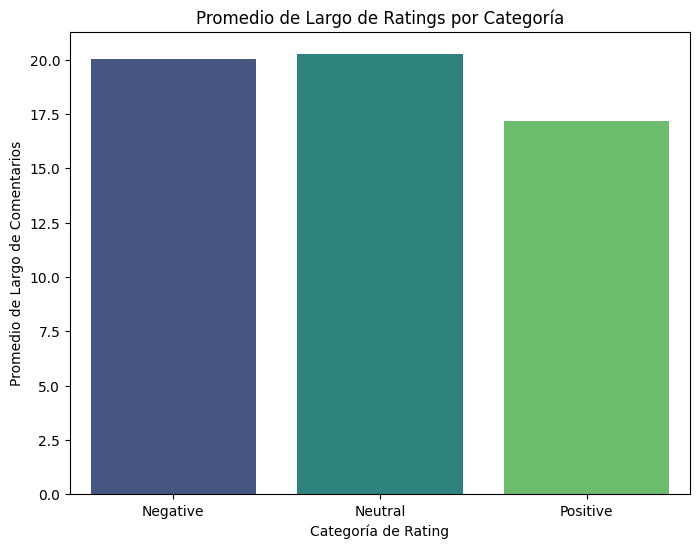

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns


relevant_ratings = mydata[mydata['rating'].isin(['Positive', 'Negative', 'Neutral'])]

relevant_ratings['comment_length'] = relevant_ratings['opinion'].apply(lambda x: len(str(x).split()))

average_lengths = relevant_ratings.groupby('rating')['comment_length'].mean()


plt.figure(figsize=(8, 6))
sns.barplot(x=average_lengths.index, y=average_lengths.values, palette='viridis')
plt.title('Promedio de Largo de Ratings por Categoría')
plt.xlabel('Categoría de Rating')
plt.ylabel('Promedio de Largo de Comentarios')
plt.show()


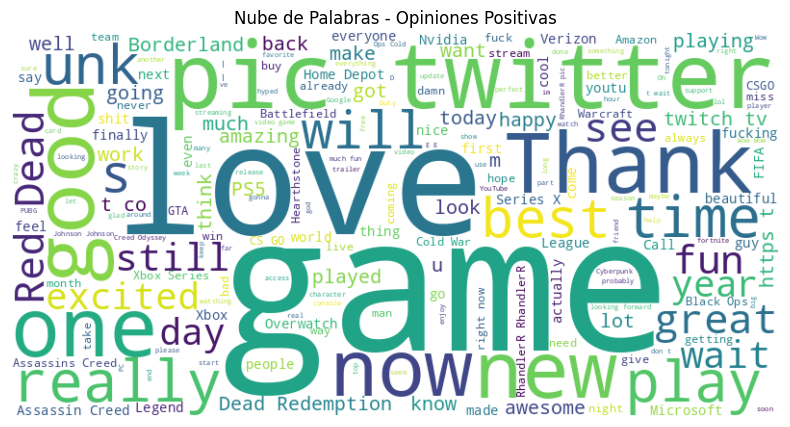

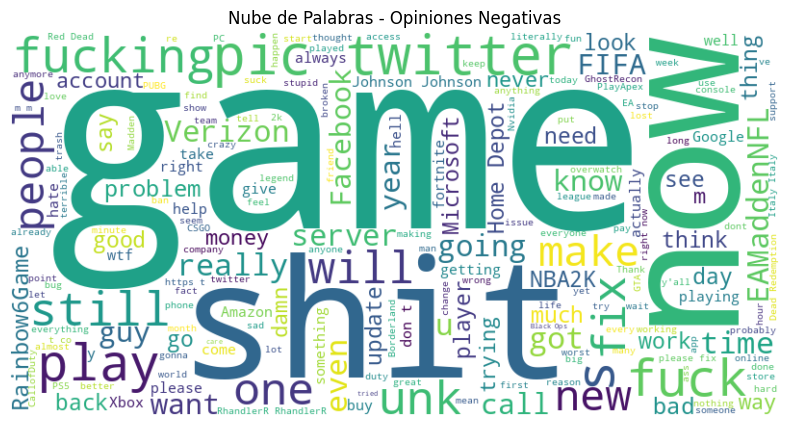

In [39]:
from wordcloud import WordCloud


positive_opinions = ' '.join(mydata[mydata['rating'] == 'Positive']['opinion'])
negative_opinions = ' '.join(mydata[mydata['rating'] == 'Negative']['opinion'])

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_opinions)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_opinions)


plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Nube de Palabras - Opiniones Positivas')
plt.axis('off')
plt.show()


plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Nube de Palabras - Opiniones Negativas')
plt.axis('off')
plt.show()

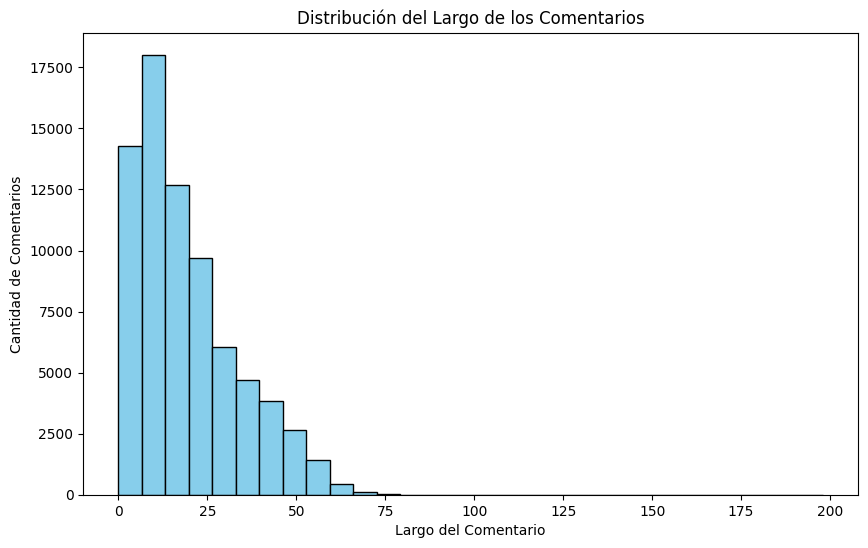

In [52]:

mydata['comment_length'] = mydata['opinion'].apply(lambda x: len(x.split()))


plt.figure(figsize=(10, 6))
plt.hist(mydata['comment_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución del Largo de los Comentarios')
plt.xlabel('Largo del Comentario')
plt.ylabel('Cantidad de Comentarios')
plt.show()